Koefficienter för funktionen:
[3.62054287e+01 7.17988991e+00 2.62564769e-03]
Kovarians-matrisen för koefficienterna:
[[ 7.88319129e-04 -7.99979933e-04  4.75627995e-08]
 [-7.99979933e-04  8.14642150e-04 -4.90818233e-08]
 [ 4.75627995e-08 -4.90818233e-08  3.62761903e-12]]


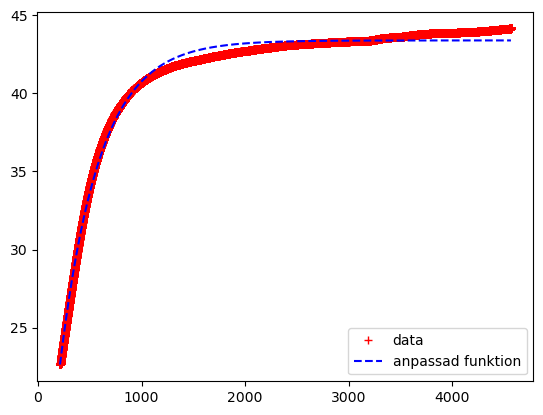

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import csv


# curve-fit() från scipy
from scipy.optimize import curve_fit



x=[]; y1=y2=y3=y4=[]
with open('datahus.csv','r') as f:
  data = csv.reader(f)
  i=0
  for row in data:
         x.append(float(row[0]))
         y1.append(float(row[1]))
#        y2.append(float(row[2]))
#        y3.append(float(row[3]))
#        y4.append(float(row[4]))

x=np.array(x)
y1=np.array(y1)


# Vi anger själv den exakta formen på den funktion som ska anpassas
# Måste ange variabel(x-värden) först och parametrar därefter
def test(x, a, b, c):
	return a * (1 - np.exp(-c * x)) + b


# curve-fit() tar som argument: funktionen, x-data och y-data
# ut får vi parametrar i en lista (param namnger vi den till)
# och kovarianser i en annan lista (som får heta param_cov)
param, param_cov = curve_fit(test, x, y1, [20,30,0.01])

# Vi skriver ut resultatet
print("Koefficienter för funktionen:")
print(param)
print("Kovarians-matrisen för koefficienterna:")
print(param_cov)

# För att kunna rita vår anpassade funktion så skapar vi y-data (ans)

ans = param[0] * (1 - np.exp(-param[2] * x)) + param[1]

# Och så vill vi titta på det grafiskt
plt.plot(x, y1, '+', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="anpassad funktion")
plt.legend()
plt.show()
